# Dive Prediction - Results

*Predicting Seabird Diving Behaviour from GPS data*

This notebook presents results of different algorithms for dive prediction based on a dataset of **74 foraging trips of seabirds** (*Sula Variegata*) with both GPS and Time Depth Recorder (TDR) tracking data. Data has been collected on **Ilha Pescadores, Peru** between 2009 and 2013.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def roc(data):
    # globally
    TP = []
    FP = []

    for tt in data.prediction.sort_values().unique():
        all_estim = 1* (data.prediction > tt)
        true_positive = np.mean(all_estim[data.dive == 1])
        true_negative = 1-np.mean(all_estim[data.dive == 0])
        TP.append(true_positive)
        FP.append(1-true_negative)
        
    return (np.array(FP), np.array(TP))

In [3]:
def outsampling(data, resolution):

    data_output = pd.DataFrame()
    for i in data.trip.unique():
        t = data[data.trip == i].copy()

        idx = [i%resolution == 0 for i in range(len(t))]

        traj = t.loc[idx, ('trip', 'datetime', 'lon', 'lat')]

        traj['dive'] = [np.max(t.dive[i:i+resolution]) for i in range(len(t)) if i%resolution==0]
        traj['prediction'] = [np.max(t.prediction[i:i+resolution]) for i in range(len(t)) if i%resolution==0]

        data_output = data_output.append(traj, ignore_index=True)

    return data_output

# SV

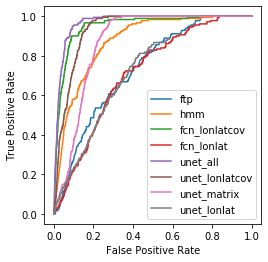

In [5]:
ftp = pd.read_csv('./results/SV_ftp_5s.csv')
hmm = pd.read_csv('./results/SV_hmm_5s.csv')

fcn_lonlatcov = pd.read_csv('./results/SV_fcn_lonlatcov_21_1_5s.csv')
fcn_lonlat = pd.read_csv('./results/SV_fcn_lonlat_21_1_5s.csv')

unet_all = pd.read_csv('./results/SV_unet_all_20_20_5s.csv')
unet_lonlatcov = pd.read_csv('./results/SV_unet_lonlatcov_20_20_5s.csv')
unet_matrix = pd.read_csv('./results/SV_unet_matrix_20_20_5s.csv')
unet_lonlat = pd.read_csv('./results/SV_unet_lonlat_20_20_5s.csv')


fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# FTP
d = roc(ftp)
plt.plot(d[0], d[1], label = 'ftp')

# HMM
d = roc(hmm)
plt.plot(d[0], d[1], label = 'hmm')
                  
# FCN - lon + lat + cov
d = roc(fcn_lonlatcov)
plt.plot(d[0], d[1], label = 'fcn_lonlatcov')

# FCN - lon + lat
d = roc(fcn_lonlat)
plt.plot(d[0], d[1], label = 'fcn_lonlat')
                  
# UNET - all
d = roc(unet_all)
plt.plot(d[0], d[1], label = 'unet_all')
                  
# UNET - lon + lat + cov
d = roc(unet_lonlatcov)
plt.plot(d[0], d[1], label = 'unet_lonlatcov')

# UNET - matrix
d = roc(unet_matrix)
plt.plot(d[0], d[1], label = 'unet_matrix')
                  
# UNET - lon + lat
d = roc(unet_lonlat)
plt.plot(d[0], d[1], label = 'unet_lonlat')
                  
plt.legend()

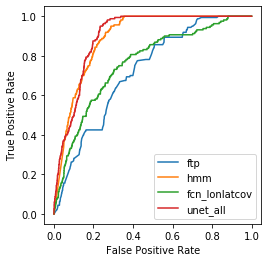

In [6]:
ftp = pd.read_csv('./results/SV_ftp_15s.csv')
hmm = pd.read_csv('./results/SV_hmm_15s.csv')

fcn_lonlatcov = pd.read_csv('./results/SV_fcn_lonlatcov_21_1_15s.csv')

unet_all = pd.read_csv('./results/SV_unet_all_20_20_15s.csv')


fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# FTP
d = roc(ftp)
plt.plot(d[0], d[1], label = 'ftp')

# HMM
d = roc(hmm)
plt.plot(d[0], d[1], label = 'hmm')
                  
# FCN - lon + lat + cov
d = roc(fcn_lonlatcov)
plt.plot(d[0], d[1], label = 'fcn_lonlatcov')
        
# UNET - all
d = roc(unet_all)
plt.plot(d[0], d[1], label = 'unet_all')
                  
plt.legend()

# LB

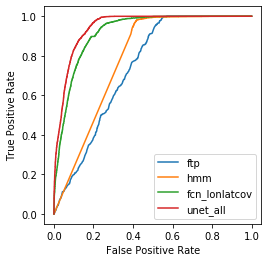

In [7]:
ftp = pd.read_csv('./results/LB_ftp_5s.csv')
hmm = pd.read_csv('./results/LB_hmm_5s.csv')

fcn_lonlatcov = pd.read_csv('./results/LB_fcn_lonlatcov_21_1_5s.csv')

unet_all = pd.read_csv('./results/LB_unet_all_20_20_5s.csv')


fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# FTP
d = roc(ftp)
plt.plot(d[0], d[1], label = 'ftp')

# HMM
d = roc(hmm)
plt.plot(d[0], d[1], label = 'hmm')
                  
# FCN - lon + lat + cov
d = roc(fcn_lonlatcov)
plt.plot(d[0], d[1], label = 'fcn_lonlatcov')
        
# UNET - all
d = roc(unet_all)
plt.plot(d[0], d[1], label = 'unet_all')
                  
plt.legend()

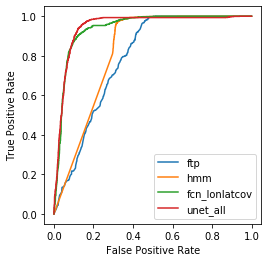

In [8]:
ftp = pd.read_csv('./results/LB_ftp_15s.csv')
hmm = pd.read_csv('./results/LB_hmm_15s.csv')

fcn_lonlatcov = pd.read_csv('./results/LB_fcn_lonlatcov_21_1_15s.csv')

unet_all = pd.read_csv('./results/LB_unet_all_20_20_15s.csv')


fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# FTP
d = roc(ftp)
plt.plot(d[0], d[1], label = 'ftp')

# HMM
d = roc(hmm)
plt.plot(d[0], d[1], label = 'hmm')
                  
# FCN - lon + lat + cov
d = roc(fcn_lonlatcov)
plt.plot(d[0], d[1], label = 'fcn_lonlatcov')
        
# UNET - all
d = roc(unet_all)
plt.plot(d[0], d[1], label = 'unet_all')
                  
plt.legend()